In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("income_evaluation.csv", encoding = 'unicode_escape')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# checking from above and label encoding columns that are required to be encoded
a = [' workclass', ' education', ' marital-status', ' occupation',' relationship',' race',' sex',' native-country',' income']
for i in a:
    df[i] = df[i].astype('|S')
    df[i] = label_encoder.fit_transform(df[i])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,15,13,4,1,1,4,1,2174,0,40,33,0
1,50,6,83311,15,13,2,9,0,4,1,0,0,13,33,0
2,38,4,215646,3,9,0,11,1,4,1,0,0,40,33,0
3,53,4,234721,1,7,2,11,0,2,1,0,0,40,33,0
4,28,4,338409,15,13,2,2,5,2,0,0,0,40,37,0


In [9]:
# checking vif
variables = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.641347,age
1,8.897415,workclass
2,4.042275,fnlwgt
3,3.809124,education
4,19.494111,education-num
5,4.016377,marital-status
6,3.745498,occupation
7,2.644352,relationship
8,17.932062,race
9,4.537727,sex


In [10]:
# now, we'll drop columns which have vif>10
df = df.drop([' education-num',' race',' hours-per-week',' native-country'], axis=1)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,15,4,1,1,1,2174,0,0
1,50,6,83311,15,2,9,0,1,0,0,0
2,38,4,215646,3,0,11,1,1,0,0,0
3,53,4,234721,1,2,11,0,1,0,0,0
4,28,4,338409,15,2,2,5,0,0,0,0


In [11]:
# removing all outliners
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,15,4,1,1,1,2174,0,0
1,50,6,83311,15,2,9,0,1,0,0,0
2,38,4,215646,3,0,11,1,1,0,0,0
3,53,4,234721,1,2,11,0,1,0,0,0
4,28,4,338409,15,2,2,5,0,0,0,0


<Axes: >

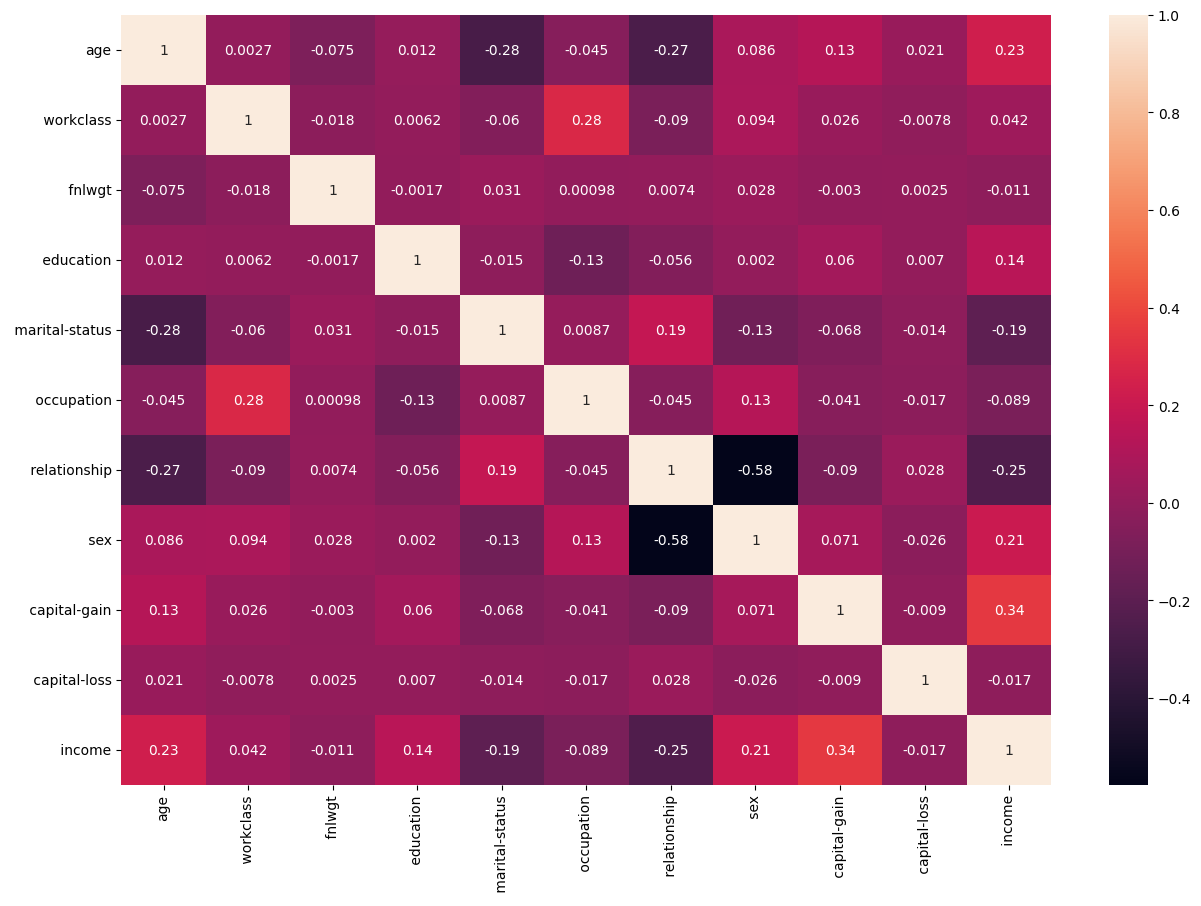

In [12]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)  # quantifying the relationship

In [13]:
data = df.values
x,y = data[:,:-1], data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

In [16]:
classifier = RandomForestClassifier(n_estimators = 50, random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [17]:
roc_auc_score(y_test, y_pred)

np.float64(0.7472822822822823)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4384,  352],
       [ 582,  768]])

Text(0.5, 1.0, 'Accuracy Score: 0.7472822822822823')

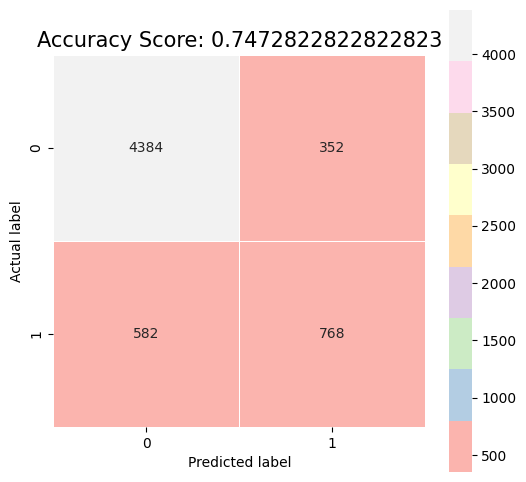

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(roc_auc_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)